<a href="https://polly.elucidata.io/manage/workspaces?action=open_polly_notebook&amp;source=github&amp;path=ElucidataInc%2Fpolly-python%2Fblob%2Fmain%2FDiscover%2Fgetting_distinct_counts_for_a_field.ipynb&amp;kernel=elucidata%2FPython+3&amp;machine=small" target="_parent"><img alt="Open in Polly" src="https://elucidatainc.github.io/PublicAssets/open_polly.svg"/></a>


# Welcome to Polly Python3 Notebook.

## Install polly-python

In [1]:
!sudo apt-get update -qq && sudo apt-get -qq install -y unzip
!curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
!unzip -qq awscliv2.zip
!sudo ./aws/install
!sudo pip3 install polly-python --quiet

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 43.7M  100 43.7M    0     0   192M      0 --:--:-- --:--:-- --:--:--  192M
replace aws/install? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
Found preexisting AWS CLI installation: /usr/local/aws-cli/v2/current. Please rerun install script with --update flag.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Import required dependencies

In [2]:
import os
from polly.omixatlas import OmixAtlas

## Auth with token on Polly

In [3]:
client = OmixAtlas(os.environ['POLLY_REFRESH_TOKEN'])

## Getting number of disease in a 

In [4]:
query1 = f"SELECT * FROM cbioportal.datasets GROUP BY disease"
data_final = client.query_metadata(query1)['disease.keyword'][0].get('buckets')

Query execution succeeded
Fetched 1 rows


## Sorting data for ease of visualization 

In [5]:
data_final_sorted = sorted(data_final, key=lambda d: d['doc_count'], reverse=True) 

## Transforming the data for plotting purpose

In [6]:
disease = []
num = []
for each_d in data_final_sorted:
    disease.append(each_d.get('key'))
    num.append(each_d.get('doc_count'))

## Plotting data

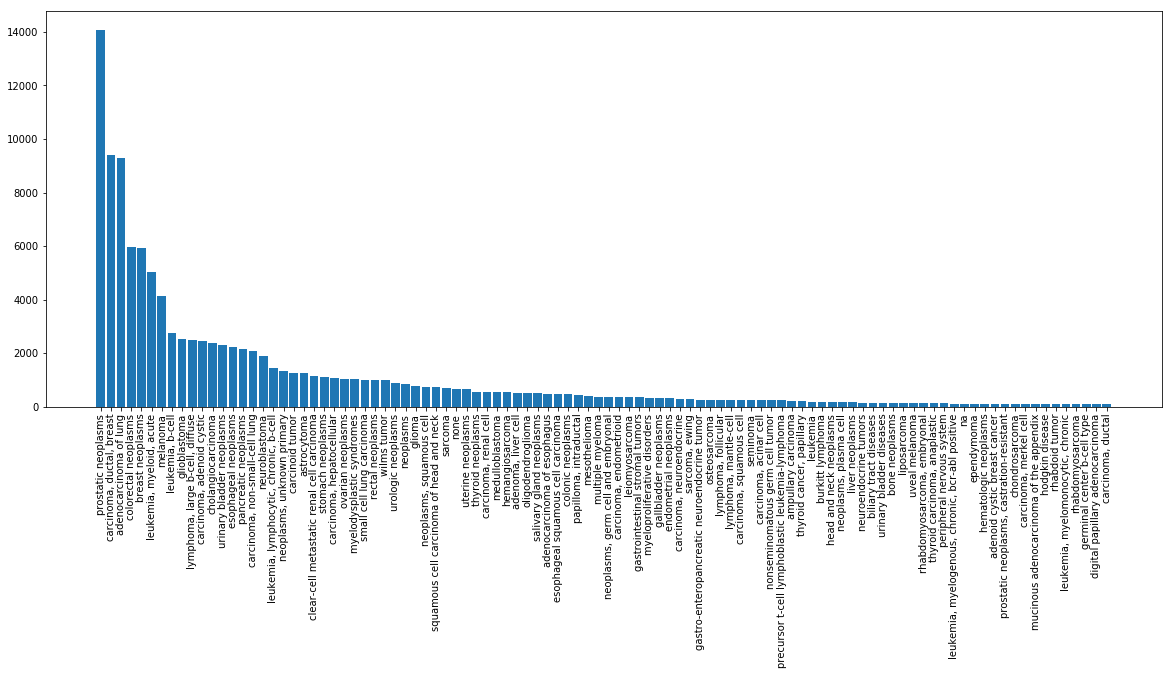

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.set_size_inches(15.5, 5.5)
ax.bar(disease,num, width=.85, bottom=None, align='center')
ax.tick_params(axis='x', labelrotation=90)
plt.show()